In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score, precision_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read the dataset
df = pd.read_csv('Dataset/Customer Churn.csv')
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [3]:
#Rename columns
renamed_columns = {'Call  Failure': 'call_failure', 'Complains':'complains', 'Subscription  Length': 'subscription_length', 'Charge  Amount': 'charge_amount',
       'Seconds of Use': 'seconds_of_use', 'Frequency of use': 'frequency_of_use', 'Frequency of SMS': 'frequency_of_sms',
       'Distinct Called Numbers': 'distinct_called_numbers', 'Age Group': 'age_group', 'Tariff Plan': 'tariff_plan', 'Status': 'status', 'Age': 'age',
       'Customer Value': 'customer_value', 'Churn': 'churn'}
df.rename(columns=renamed_columns, inplace=True)
df.columns

Index(['call_failure', 'complains', 'subscription_length', 'charge_amount',
       'seconds_of_use', 'frequency_of_use', 'frequency_of_sms',
       'distinct_called_numbers', 'age_group', 'tariff_plan', 'status', 'age',
       'customer_value', 'churn'],
      dtype='object')

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   call_failure             3150 non-null   int64  
 1   complains                3150 non-null   int64  
 2   subscription_length      3150 non-null   int64  
 3   charge_amount            3150 non-null   int64  
 4   seconds_of_use           3150 non-null   int64  
 5   frequency_of_use         3150 non-null   int64  
 6   frequency_of_sms         3150 non-null   int64  
 7   distinct_called_numbers  3150 non-null   int64  
 8   age_group                3150 non-null   int64  
 9   tariff_plan              3150 non-null   int64  
 10  status                   3150 non-null   int64  
 11  age                      3150 non-null   int64  
 12  customer_value           3150 non-null   float64
 13  churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

In [ ]:
#Selecting Features and Labels
features = df.drop('churn', axis=1)
features.drop(columns=['customer_value'], inplace = True)
features.drop(columns=['age_group'], inplace = True)
features.drop(columns=['seconds_of_use'], inplace = True)

label = df['churn']

In [6]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(features, label, train_size = .8, test_size=0.2, random_state=19)

In [7]:
#Normalizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Logistic Regression

Training Score: 0.8912698412698413
Test Score: 0.8888888888888888


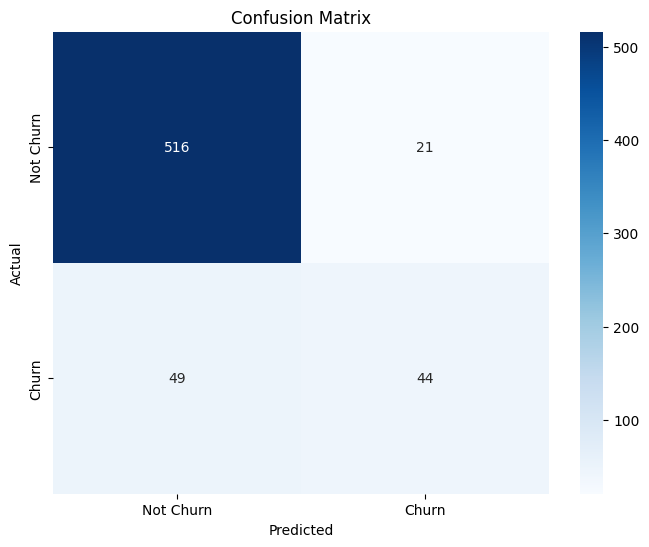

F1 Score: 0.5569620253164557
Accuracy: 0.8888888888888888
Recall: 0.4731182795698925
Precision: 0.676923076923077


In [8]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

predictions = log_model.predict_proba(X_test)
train_score = log_model.score(X_train, y_train)
test_score = log_model.score(X_test, y_test)
print(f'Training Score: {train_score}')
print(f'Test Score: {test_score}')

conf_matrix = confusion_matrix(y_test, log_model.predict(X_test))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', 
            xticklabels=['Not Churn', 'Churn'], 
            yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

f1 = f1_score(y_test, log_model.predict(X_test))
accuracy = accuracy_score(y_test, log_model.predict(X_test))
recall = recall_score(y_test, log_model.predict(X_test))
precision = precision_score(y_test, log_model.predict(X_test))
print(f'F1 Score: {f1}')
print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')

### Random Forest Classifier

Training Score: 0.9928571428571429
Test Score: 0.9507936507936507


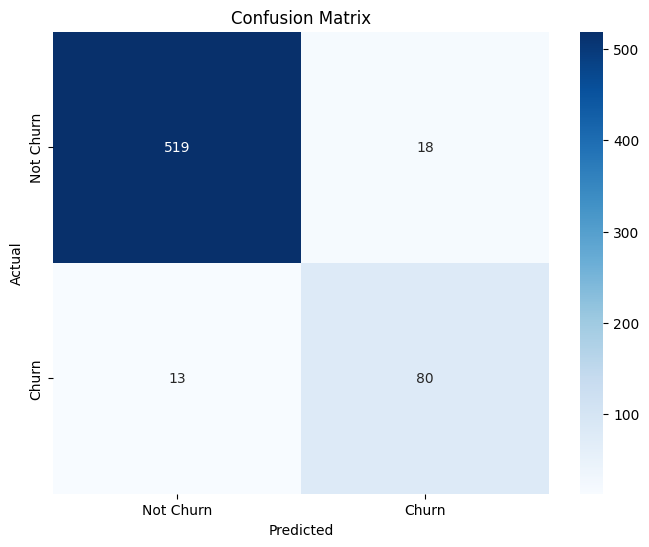

F1 Score: 0.837696335078534
Accuracy: 0.9507936507936507
Recall: 0.8602150537634409
Precision: 0.8163265306122449


In [9]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=19)
rf_model.fit(X_train, y_train)

predictions = rf_model.predict_proba(X_test)
train_score = rf_model.score(X_train, y_train)
test_score = rf_model.score(X_test, y_test)
print(f'Training Score: {train_score}')
print(f'Test Score: {test_score}')

conf_matrix = confusion_matrix(y_test, rf_model.predict(X_test))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', 
            xticklabels=['Not Churn', 'Churn'], 
            yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

f1 = f1_score(y_test, rf_model.predict(X_test))
accuracy = accuracy_score(y_test, rf_model.predict(X_test))
recall = recall_score(y_test, rf_model.predict(X_test))
precision = precision_score(y_test, rf_model.predict(X_test))
print(f'F1 Score: {f1}')
print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')

### Gradient Boosting Classifier

Training Score: 0.9634920634920635
Test Score: 0.9285714285714286


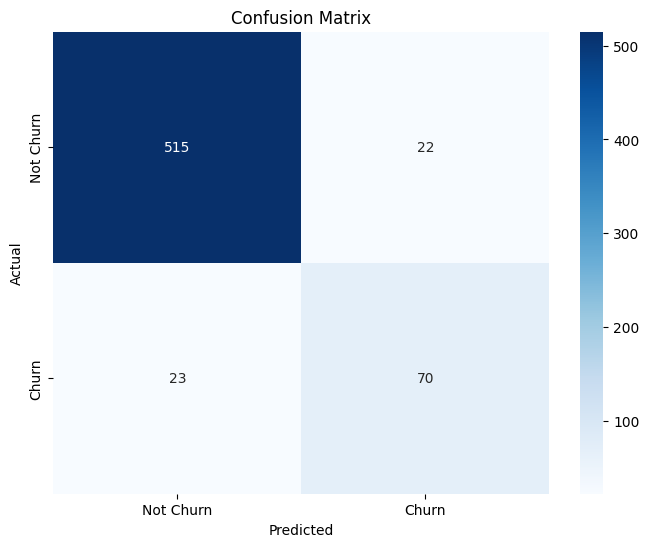

F1 Score: 0.7567567567567568
Accuracy: 0.9285714285714286
Recall: 0.7526881720430108
Precision: 0.7608695652173914


In [10]:
gb_model = GradientBoostingClassifier(random_state=19)
gb_model.fit(X_train, y_train)

predictions = gb_model.predict_proba(X_test)
train_score = gb_model.score(X_train, y_train)
test_score = gb_model.score(X_test, y_test)
print(f'Training Score: {train_score}')
print(f'Test Score: {test_score}')

conf_matrix = confusion_matrix(y_test, gb_model.predict(X_test))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', 
            xticklabels=['Not Churn', 'Churn'], 
            yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

f1 = f1_score(y_test, gb_model.predict(X_test))
accuracy = accuracy_score(y_test, gb_model.predict(X_test))
recall = recall_score(y_test, gb_model.predict(X_test))
precision = precision_score(y_test, gb_model.predict(X_test))
print(f'F1 Score: {f1}')
print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')

### Support Vector Classifier

Training Score: 0.925
Test Score: 0.9301587301587302


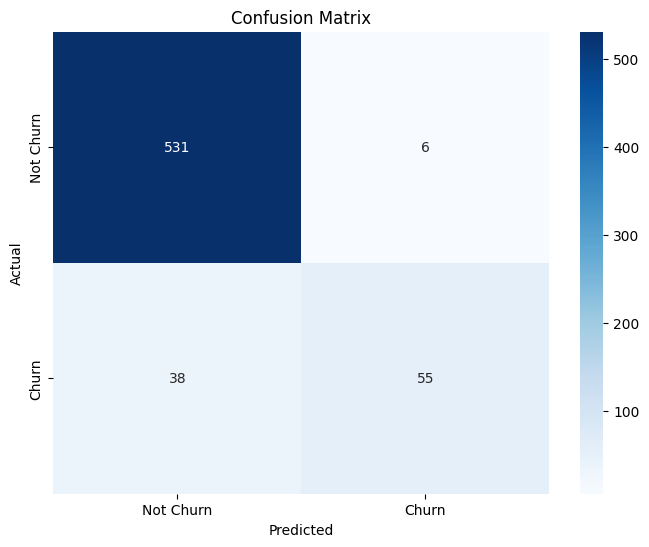

F1 Score: 0.7142857142857143
Accuracy: 0.9301587301587302
Recall: 0.5913978494623656
Precision: 0.9016393442622951


In [11]:
svm_model = SVC(probability=True, random_state=19)
svm_model.fit(X_train, y_train)

predictions = svm_model.predict_proba(X_test)
train_score = svm_model.score(X_train, y_train)
test_score = svm_model.score(X_test, y_test)
print(f'Training Score: {train_score}')
print(f'Test Score: {test_score}')

conf_matrix = confusion_matrix(y_test, svm_model.predict(X_test))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', 
            xticklabels=['Not Churn', 'Churn'], 
            yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

f1 = f1_score(y_test, svm_model.predict(X_test))
accuracy = accuracy_score(y_test, svm_model.predict(X_test))
recall = recall_score(y_test, svm_model.predict(X_test))
precision = precision_score(y_test, svm_model.predict(X_test))
print(f'F1 Score: {f1}')
print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')

### MLP Classifier (using sklearn)

Training Score: 0.9718253968253968
Test Score: 0.9587301587301588


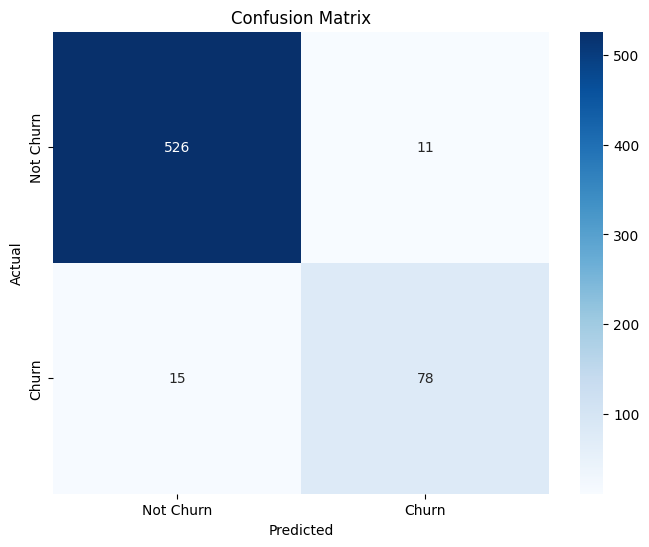

F1 Score: 0.8571428571428571
Accuracy: 0.9587301587301588
Recall: 0.8387096774193549
Precision: 0.8764044943820225


In [12]:
nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=19)
nn_model.fit(X_train, y_train)

predictions = nn_model.predict_proba(X_test)
train_score = nn_model.score(X_train, y_train)
test_score = nn_model.score(X_test, y_test)
print(f'Training Score: {train_score}')
print(f'Test Score: {test_score}')

conf_matrix = confusion_matrix(y_test, nn_model.predict(X_test))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', 
            xticklabels=['Not Churn', 'Churn'], 
            yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

f1 = f1_score(y_test, nn_model.predict(X_test))
accuracy = accuracy_score(y_test, nn_model.predict(X_test))
recall = recall_score(y_test, nn_model.predict(X_test))
precision = precision_score(y_test, nn_model.predict(X_test))
print(f'F1 Score: {f1}')
print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')

## Comparison of the above models

| Model | Accuracy | F1 Score | Precision | Recall |
| --- | --- | --- | --- | --- |
| Logistic Regression | 0.88 | 0.56 | 0.68 | 0.47 |
| Random Forest Classifier | 0.95 | 0.84 | 0.82 | 0.86 |
| Gradient Boosting Classifier | 0.93 | 0.76 | 0.76 | 0.75 |
| Support Vector Classifier | 0.93 | 0.71 | 0.90 | 0.59 |
| MLP Classifier | 0.96 | 0.86 | 0.88 | 0.84 |
